<a href="https://colab.research.google.com/github/MoreenMarutaData/SUPERVISED-TO-UNSUPERVISED-LEARNING-IN-R/blob/main/ANALYSIS_OF_ADVERTISEMENTS_USING_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AN ANALYSIS FOR ADVERTISEMENTS

DEFINING THE QUESTION

To identify similar characteristics of individuals most likely to click on ad from a cryptography course website

METRIC FOR SUCCESS

Finding more three similarities of people viewing or not viewing the advertisements

THE CONTEXT

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads.

EXPERIMENTAL DESIGN TAKEN

* Loading the dataset
* Data cleaning
* Exploratory Data Analysis
* Statement of the findings

## LOAD AND CHECK DATA

In [ ]:
df<- read.csv("http://bit.ly/IPAdvertisingData")


In [ ]:
head(df)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [ ]:
tail(df)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
995,43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
996,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
997,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
998,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
999,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
1000,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


lets check for the shape of our dataset

In [ ]:
dim(df)

[1] 1000   10

In [ ]:
ncol(df)

[1] 10

In [ ]:
nrow(df)

[1] 1000

we have 10 columns and 1000 rows

lets check for the data types in our dataset. It also shows a few examples

In [ ]:
str(df)

'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : chr  "2016-03-27 00:53:11" "2016-04-04 01:39:02" "2016-03-13 20:35:42" "2016-01-10 02:31:19" ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


we have 3 numerical columns entries, 3 integer column entires and 4 character column entries. We have to change the timestamp column to date time column later on. We shall also change the column names to lowercase later on.

viewing the column names only

In [ ]:
names(df)

[1] "Daily.Time.Spent.on.Site" "Age"                     
 [3] "Area.Income"              "Daily.Internet.Usage"    
 [5] "Ad.Topic.Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked.on.Ad"

## CLEANING THE DATA

let us change the column names to lower case

In [ ]:
# to change rows
# df<- apply(df,2,tolower)
names(df)<- tolower(names(df))
names(df)

[1] "daily.time.spent.on.site" "age"                     
 [3] "area.income"              "daily.internet.usage"    
 [5] "ad.topic.line"            "city"                    
 [7] "male"                     "country"                 
 [9] "timestamp"                "clicked.on.ad"

let us rename the male column to gender

In [ ]:
names(df)[7] <- "gender"
names(df)

[1] "daily.time.spent.on.site" "age"                     
 [3] "area.income"              "daily.internet.usage"    
 [5] "ad.topic.line"            "city"                    
 [7] "gender"                   "country"                 
 [9] "timestamp"                "clicked.on.ad"

let us change the time stamp column to date time format

In [ ]:
df[['timestamp']] <- strptime(df[['timestamp']], format="%Y-%m-%d %H:%M:%S")
str(df['timestamp'])

'data.frame':	1000 obs. of  1 variable:
 $ timestamp: POSIXlt, format: "2016-03-27 00:53:11" "2016-04-04 01:39:02" ...


lets split it to hour and day and month and year

In [ ]:
install.packages("lubridate")
library("lubridate")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [ ]:
df$year<- year(ymd_hms(df$timestamp))
df$month<- month(ymd_hms(df$timestamp))
df$hour<- hour(ymd_hms(df$timestamp))
head(df, 2)

,daily.time.spent.on.site,age,area.income,daily.internet.usage,ad.topic.line,city,gender,country,timestamp,clicked.on.ad,year,month,hour
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dttm>,<int>,<dbl>,<dbl>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,2016,3,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,2016,4,1


then convert the valid date time columns into the valid formats

In [ ]:
str(df)

'data.frame':	1000 obs. of  13 variables:
 $ daily.time.spent.on.site: num  69 80.2 69.5 74.2 68.4 ...
 $ age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ area.income             : num  61834 68442 59786 54806 73890 ...
 $ daily.internet.usage    : num  256 194 236 246 226 ...
 $ ad.topic.line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ city                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ gender                  : int  0 1 0 1 0 1 0 1 1 1 ...
 $ country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ timestamp               : POSIXlt, format: "2016-03-27 00:53:11" "2016-04-04 01:39:02" ...
 $ clicked.on.ad           : int  0 0 0 0 0 0 0 1 0 0 ...
 $ year                    : num  2016 2016 2016 2016 2016 ...
 $ month                   : num  3 4 3 1 6 5 1 3 4 7 ...
 $ hour         

let us check for duplicates

In [ ]:
sum(duplicated(df))

[1] 0

There are none, let us check for missing values

In [ ]:
sum(is.na(df))

[1] 0

There are none, lets check for anomalies

In [ ]:
a<- lapply(df, unique)
a

$daily.time.spent.on.site
  [1] 68.95 80.23 69.47 74.15 68.37 59.99 88.91 66.00 74.53 69.88 47.64 83.07
 [13] 69.57 79.52 42.95 63.45 55.39 82.03 54.70 74.58 77.22 84.59 41.49 87.29
 [25] 41.39 78.74 48.53 51.95 70.20 76.02 67.64 86.41 59.05 55.60 57.64 84.37
 [37] 62.26 65.82 50.43 38.93 84.98 64.24 82.52 81.38 80.47 37.68 69.62 85.40
 [49] 44.33 48.01 73.18 79.94 33.33 50.33 62.31 80.60 65.19 44.98 77.63 41.82
 [61] 85.61 85.84 72.08 86.06 45.96 62.42 63.89 35.33 75.74 78.53 46.13 69.01
 [73] 55.35 33.21 38.46 64.10 49.81 82.73 56.14 55.13 78.11 73.46 56.64 68.94
 [85] 70.79 57.76 77.51 52.70 57.70 56.89 69.90 55.79 70.03 50.08 43.67 72.84
 [97] 45.72 39.94 35.61 79.71 63.60 89.91 68.18 66.49 80.49 72.23 42.39 47.53
[109] 74.02 66.63 63.24 71.00 69.00 76.99 72.60 61.88 84.45 88.97 86.19 49.58
[121] 77.65 37.75 62.33 79.57 80.31 89.05 70.41 67.36 46.98 41.67 51.24 75.70
[133] 43.49 49.89 38.37 38.52 71.89 75.80 83.86 37.51 83.67 69.08 37.47 56.04
[145] 70.92 49.78 68.61 58.18 78.54 37

number of unique values in each column

In [ ]:
u<- lengths(a)
u

daily.time.spent.on.site                      age              area.income 
                     900                       43                     1000 
    daily.internet.usage            ad.topic.line                     city 
                     966                     1000                      969 
                  gender                  country                timestamp 
                       2                      237                     1000 
           clicked.on.ad                     year                    month 
                       2                        1                        7 
                    hour 
                      24

daily time spent seems to have an anomaly, let us take a closer look

In [ ]:
unique(df[['daily.time.spent.on.site']])

[1] 68.95 80.23 69.47 74.15 68.37 59.99 88.91 66.00 74.53 69.88 47.64 83.07
 [13] 69.57 79.52 42.95 63.45 55.39 82.03 54.70 74.58 77.22 84.59 41.49 87.29
 [25] 41.39 78.74 48.53 51.95 70.20 76.02 67.64 86.41 59.05 55.60 57.64 84.37
 [37] 62.26 65.82 50.43 38.93 84.98 64.24 82.52 81.38 80.47 37.68 69.62 85.40
 [49] 44.33 48.01 73.18 79.94 33.33 50.33 62.31 80.60 65.19 44.98 77.63 41.82
 [61] 85.61 85.84 72.08 86.06 45.96 62.42 63.89 35.33 75.74 78.53 46.13 69.01
 [73] 55.35 33.21 38.46 64.10 49.81 82.73 56.14 55.13 78.11 73.46 56.64 68.94
 [85] 70.79 57.76 77.51 52.70 57.70 56.89 69.90 55.79 70.03 50.08 43.67 72.84
 [97] 45.72 39.94 35.61 79.71 63.60 89.91 68.18 66.49 80.49 72.23 42.39 47.53
[109] 74.02 66.63 63.24 71.00 69.00 76.99 72.60 61.88 84.45 88.97 86.19 49.58
[121] 77.65 37.75 62.33 79.57 80.31 89.05 70.41 67.36 46.98 41.67 51.24 75.70
[133] 43.49 49.89 38.37 38.52 71.89 75.80 83.86 37.51 83.67 69.08 37.47 56.04
[145] 70.92 49.78 68.61 58.18 78.54 37.00 65.40 87.98 44.64 41.73 80.46 75.55
[157] 76.32 82.68 72.01 75.83 41.28 34.66 66.18 59.59 86.69 43.77 71.84 74.41
[169] 63.36 71.74 60.72 72.04 44.57 85.86 39.85 84.53 62.95 67.58 85.56 46.88
[181] 46.31 77.95 84.73 39.86 60.23 60.70 77.20 71.86 44.78 78.57 73.41 77.05
[193] 66.40 69.35 35.65 70.04 69.78 58.22 76.90 84.08 59.51 40.15 76.81 41.89
[205] 76.87 67.28 81.98 66.01 61.57 53.30 34.87 43.60 77.88 49.95 60.94 89.15
[217] 78.70 57.35 34.86 70.68 76.06 66.67 46.77 78.32 37.32 40.42 76.77 65.65
[229] 74.32 73.27 80.03 53.68 85.03 70.44 81.22 39.96 57.05 42.44 62.20 76.70
[241] 61.22 84.54 46.08 56.70 81.03 80.91 40.06 83.47 73.84 74.65 60.25 59.21
[253] 43.02 84.04 70.66 70.58 72.44 40.17 79.15 44.49 73.04 76.28 68.88 73.10
[265] 47.66 87.30 89.34 81.37 81.67 46.37 54.88 40.67 71.76 47.51 75.15 56.01
[277] 82.87 45.05 60.53 50.52 84.71 55.20 81.61 71.55 82.40 73.95 72.07 80.39
[289] 65.80 69.97 52.62 39.25 77.56 33.52 79.81 84.79 82.70 84.88 54.92 76.56
[301] 69.74 72.19 84.29 73.89 75.84 73.38 80.72 62.06 51.50 90.97 86.78 84.33
[313] 36.87 34.78 76.84 67.05 41.47 80.71 80.09 56.30 79.36 86.38 38.94 87.26
[325] 75.32 74.38 65.90 36.31 88.12 83.97 61.09 65.77 81.58 37.87 76.20 60.91
[337] 74.49 73.71 78.19 79.54 74.87 87.09 37.45 49.84 51.38 83.40 38.91 62.14
[349] 79.72 73.30 69.11 71.90 72.45 77.07 74.62 82.07 58.60 36.08 79.44 73.19
[361] 77.60 89.00 69.20 67.56 81.11 80.22 43.63 77.66 74.63 49.67 80.59 83.49
[373] 44.46 68.10 63.88 78.83 79.97 80.51 66.99 71.05 42.05 76.24 77.29 35.98
[385] 84.95 39.34 87.23 57.24 56.34 48.73 51.68 35.34 48.09 78.68 68.82 56.99
[397] 86.63 41.18 71.03 72.92 77.14 34.30 83.71 53.38 58.03 43.59 60.07 54.43
[409] 81.99 84.69 88.72 88.89 69.58 85.23 83.55 56.66 56.39 78.18 46.04 79.40
[421] 36.44 53.14 32.84 73.72 38.10 73.93 51.87 77.69 43.41 55.92 80.67 83.42
[433] 82.12 66.17 43.01 80.05 64.88 79.82 48.03 32.99 74.88 36.49 88.04 45.70
[445] 82.38 52.68 65.59 43.84 67.69 78.37 81.46 47.48 78.76 44.96 39.56 39.76
[457] 57.11 83.26 69.42 50.60 46.20 66.88 35.49 80.29 50.19 59.12 59.88 59.70
[469] 67.80 81.59 81.10 41.70 73.94 58.35 51.56 58.21 66.12 49.99 80.30 57.86
[481] 70.29 59.13 81.51 42.94 84.81 82.79 59.22 35.00 46.61 63.26 79.16 67.94
[493] 79.91 66.14 43.65 59.61 89.37 65.10 53.44 79.53 91.43 73.57 76.49 61.72
[505] 72.03 77.47 75.65 78.15 63.80 76.59 42.60 78.77 81.95 44.73 38.35 72.53
[517] 56.20 79.67 75.42 78.64 59.52 64.75 47.90 80.38 64.51 71.28 50.32 72.76
[529] 72.80 74.59 46.66 48.86 37.05 81.21 66.89 68.11 69.15 65.72 40.04 68.60
[541] 56.16 78.60 78.29 43.83 77.31 66.77 57.20 73.15 43.97 77.25 74.84 83.53
[553] 38.63 84.00 52.13 71.83 78.36 50.18 64.67 69.50 65.22 32.91 39.50 75.19
[565] 76.21 67.76 40.01 68.41 35.55 74.54 81.75 87.85 87.97 78.17 67.91 85.77
[577] 41.16 53.54 63.43 70.13 40.19 58.95 35.76 59.36 91.10 61.04 74.06 64.63
[589] 81.29 76.07 75.92 78.35 46.14 46.43 66.04 84.31 83.66 81.25 85.26 86.53
[601] 76.44 52.84 85.24 74.71 82.95 76.42 42.04 46.28 48.26 58.05 75.00 79.61
[613] 52.56 62.18 77.89 

In [ ]:
# subset(df, 'daily.time.spent.on.site' == ⋯ )
# #  help here please

In [ ]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
install.packages("data.table") # install package data.table to work with data tables
library(data.table) # load package
install.packages("tidyverse") # install packages to work with data frame - extends into visualization
library(tidyverse) 


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.1.4     ✔ forcats 0.5.1
✔ readr   2.1.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ data.table::between()    masks dplyr::between()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ data.table::first()      masks dplyr::first()
✖ data.table::hour()       mask

lets check for outliers

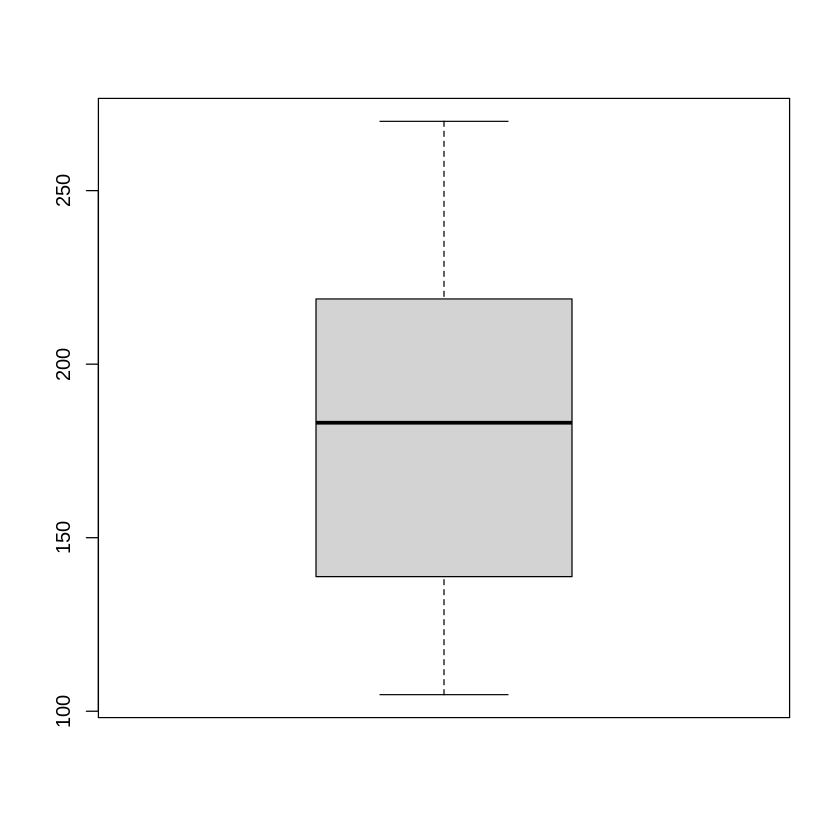

In [ ]:
boxplot(df["daily.internet.usage"])

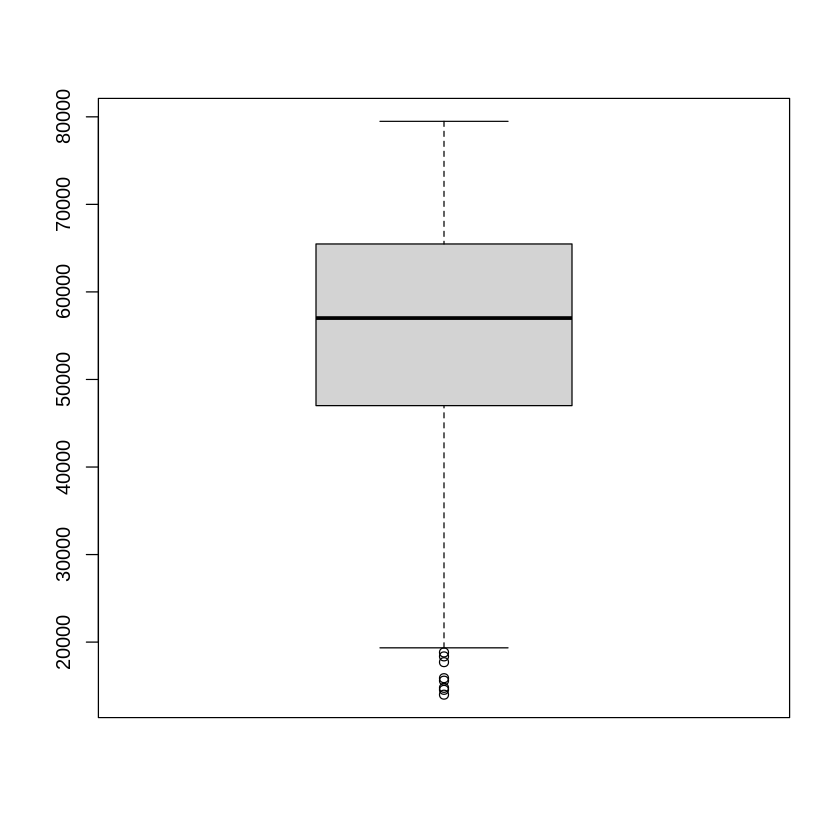

In [ ]:
boxplot(df["area.income"])

area income has outliers. let us change the values to null values so we can easily remove them

In [ ]:
liers <- boxplot.stats(df$area.income)$out
liers

df$area.income[df$area.income == "liers"] <- NA


[1] 17709.98 18819.34 15598.29 15879.10 14548.06 13996.50 14775.50 18368.57

In [ ]:
sum(is.na(df))

[1] 0

In [ ]:
df<- na.omit(df)
sum(is.na(df))

[1] 0

In [ ]:
# for (x in c("area.income"))
# {
#    value=df[,x]
#   (df[,x]) %in% boxplot.stats(df[,x])$out
  
#    df[,x][df[,x] %in% value] = NA
# }

# # check for nulls
# sum(is.na(df$area.income))

# # drop nulls
# df<- df[!sapply(df, is.null)]

# colSums(is.na(df))


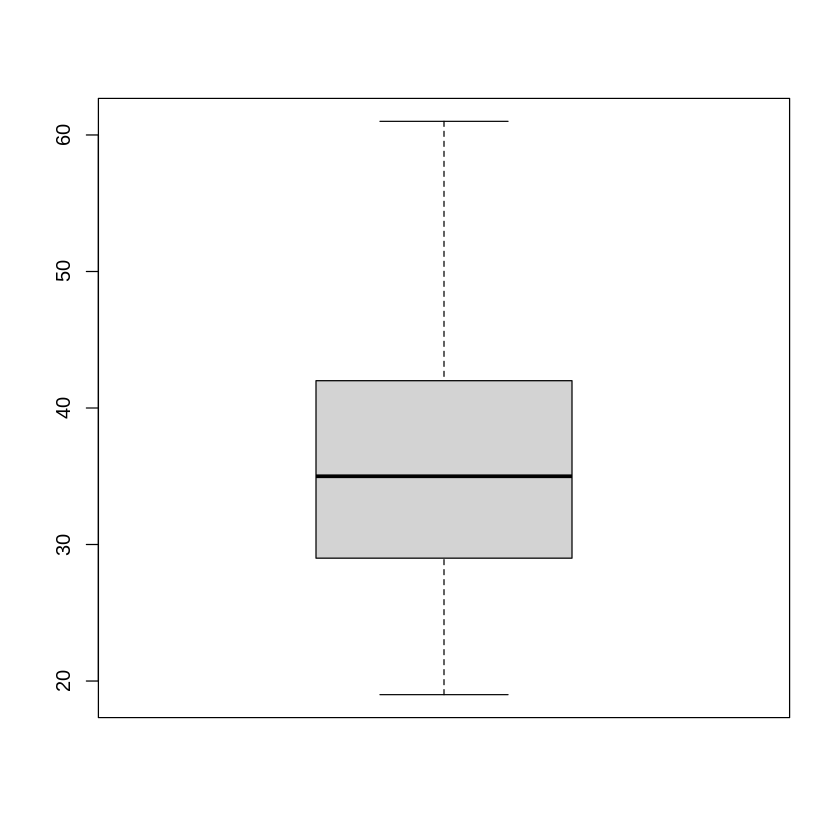

In [ ]:
boxplot(df["age"])

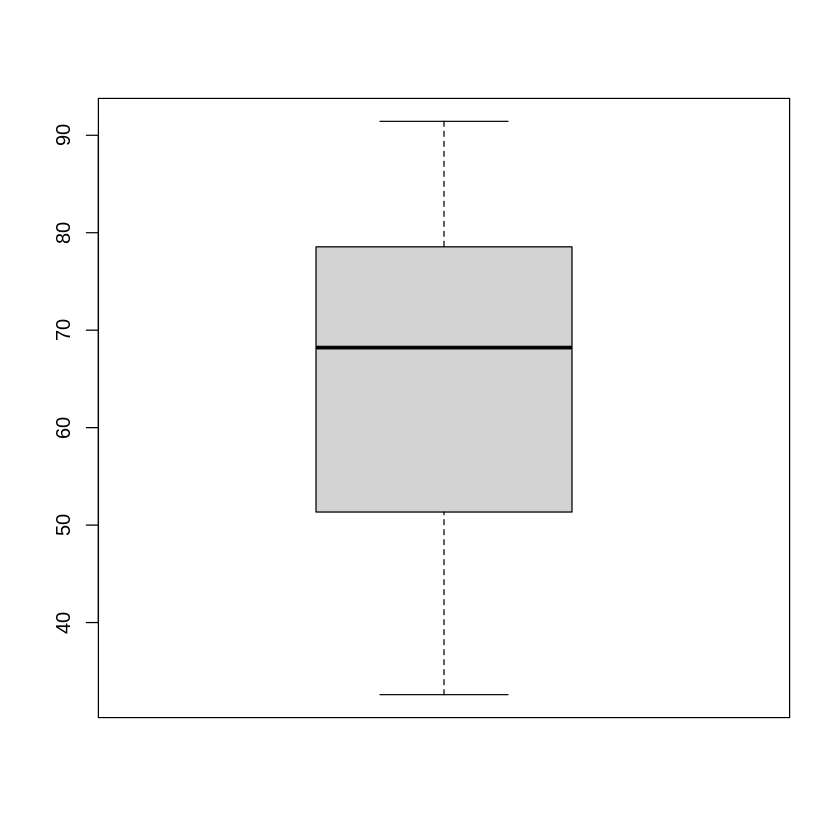

In [ ]:
boxplot(df["daily.time.spent.on.site"])

no more outliers in the numerical columns

EXPLORATORY DATA ANALYSIS

In [ ]:
table(df$gender)


  0   1 
519 481 

we have slightly more females than males in our data

In [ ]:
summary(df)

 daily.time.spent.on.site      age         area.income    daily.internet.usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 ad.topic.line          city               gender        country         
 Length:1000        Length:1000        Min.   :0.000   Length:1000       
 Class :character   Class :character   1st Qu.:0.000   Class :character  
 Mode  :character   Mode  :character   Median :0.000   Mode  :character  
                                       Mean   :0.481                     
                                       3rd Qu.:1.000                     
   

From the above we can see the minimum, maximum, mean, median and 1st and 3rd quartile values for our columns. now lets the get the mode, standard deviation, skewness of our columns.

In [ ]:
install.packages("DescTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library("DescTools")


Attaching package: ‘DescTools’


The following object is masked from ‘package:data.table’:

    %like%




##People who clicked ads **most**

In [ ]:
table(df$clicked.on.ad)


  0   1 
500 500 

we have a very slight difference between people that did not click the ad than those that did.

lets replace 0 and 1 with female f and male m

In [ ]:
df$gender[df$gender == 0]<- "f"
df$gender[df$gender == 1]<- "m"

distribution of genders on how they clicked ads

In [ ]:
table(df$gender, df$clicked.on.ad)

   
      0   1
  f 250 269
  m 250 231

more females clicked the ads more than males. lets plot it


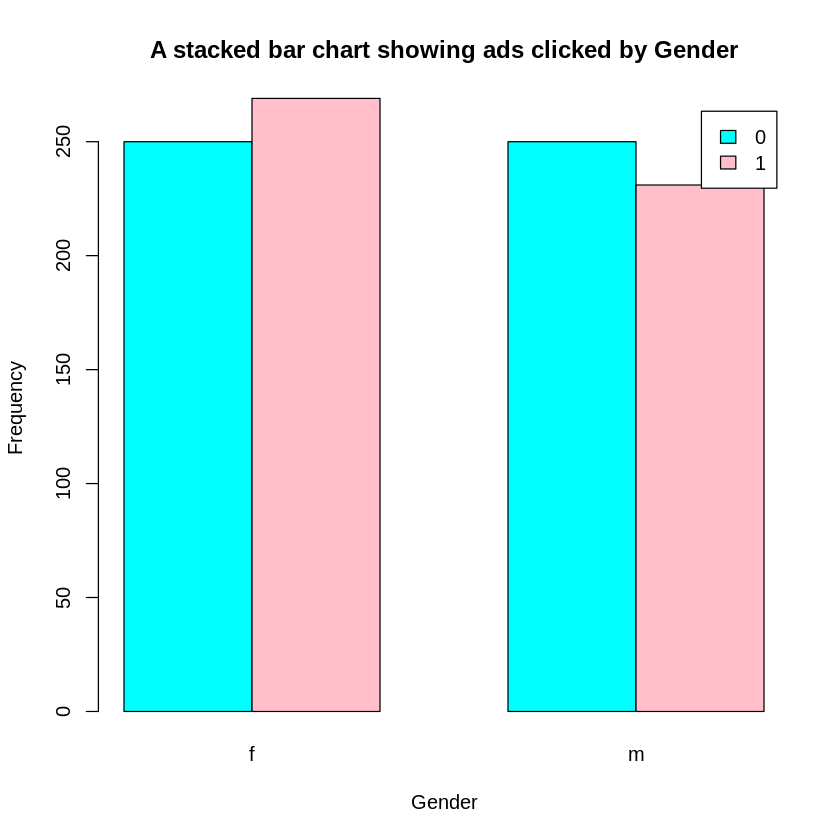

In [ ]:
counts <- table(df$clicked.on.ad, df$gender)
barplot(counts,
  main="A stacked bar chart showing ads clicked by Gender",
  xlab="Gender",
  ylab = "Frequency",
  col=c("cyan","pink"),
  legend = rownames(counts), beside=TRUE)

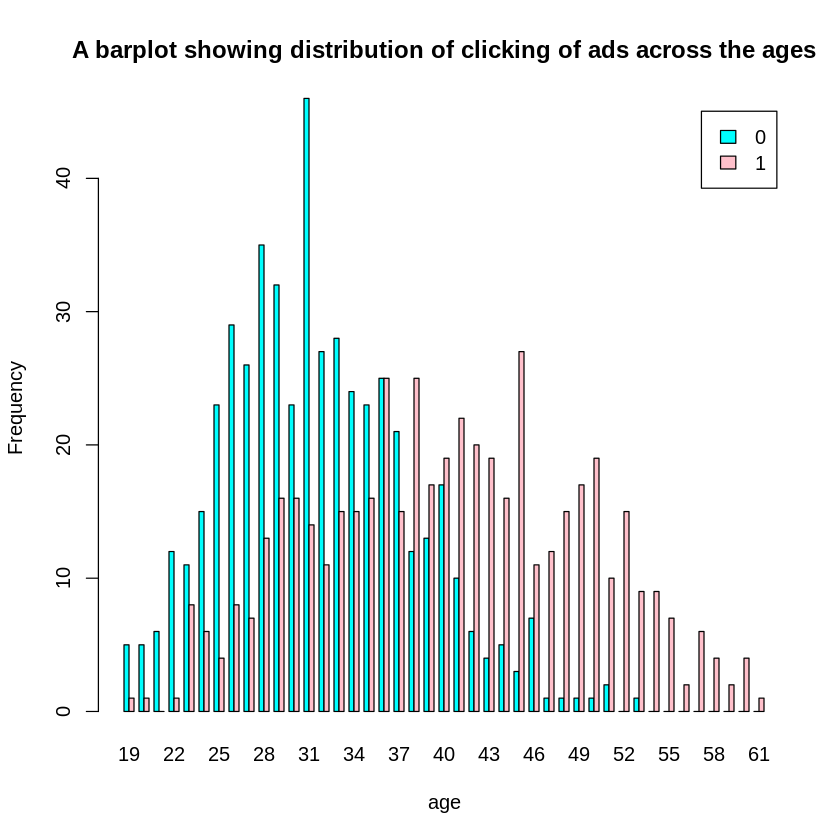

In [ ]:
counts <- table(df$clicked.on.ad, df$age)
barplot(counts,
  main="A barplot showing distribution of clicking of ads across the ages",
  xlab="age",
  ylab = "Frequency",
  col=c("cyan","pink"),
  legend = rownames(counts), beside=TRUE)

most ages that clicked the ads were between 37 years and 50. with 45 year olds topping the chart. most men that watch the ads are below 40 yrs

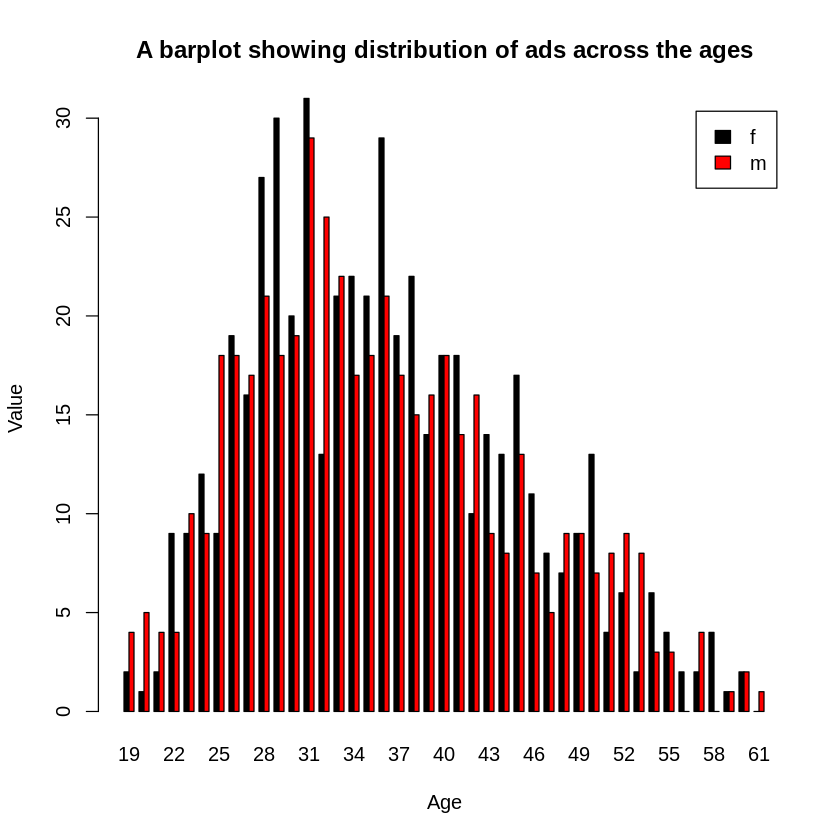

In [ ]:
counts <- table(df$gender, df$age)
barplot(counts,
  main="A barplot showing distribution of ads across the ages",
  xlab="Age",
  ylab = "Value",
  col=c("black","red"),
  legend = rownames(counts), beside=TRUE)

most 45 years olds in the data are female so that concurs with the earlier statement.

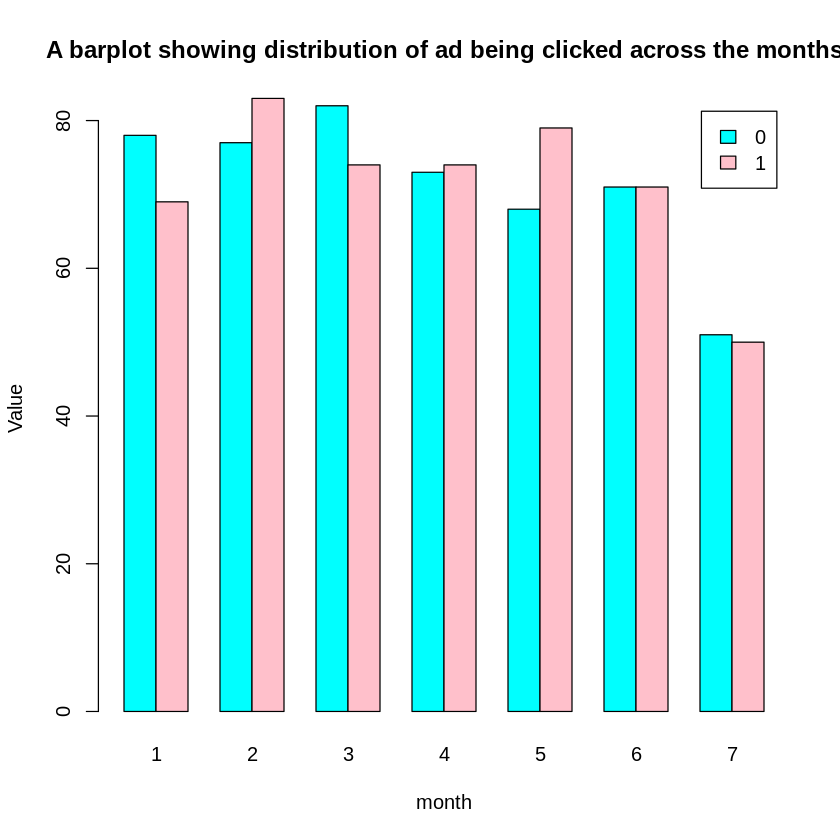

In [ ]:
counts <- table(df$clicked.on.ad, df$month)
barplot(counts,
  main="A barplot showing distribution of ad being clicked across the months",
  xlab="month",
  ylab = "Value",
  col=c("cyan","pink"),
  legend = rownames(counts), beside=TRUE)

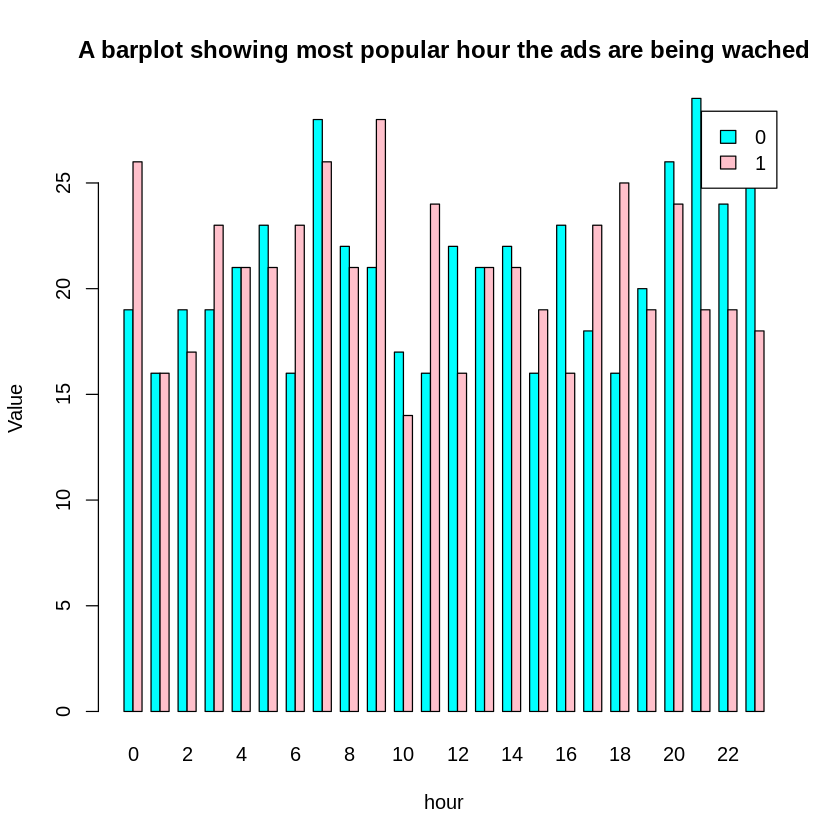

In [ ]:
counts <- table(df$clicked.on.ad, df$hour)
barplot(counts,
  main="A barplot showing most popular hour the ads are being wached",
  xlab="hour",
  ylab = "Value",
  col=c("cyan","pink"),
  legend = rownames(counts), beside=TRUE)

most ads are watched at 7am, 9am, 11am. 

##Countries that clicked the ads the most and least

In [ ]:
country_freq <- sort(table(df[df$clicked.on.ad==1,]$country), decreasing = T)%>% as.data.frame() 
country_freq[country_freq$Freq > 4,]
head(country_freq)

,Var1,Freq
,<fct>,<int>
1,Australia,7
2,Ethiopia,7
3,Turkey,7
4,Liberia,6
5,Liechtenstein,6
6,South Africa,6
7,Afghanistan,5
8,France,5
9,Hungary,5


,Var1,Freq
,<fct>,<int>
1,Australia,7
2,Ethiopia,7
3,Turkey,7
4,Liberia,6
5,Liechtenstein,6
6,South Africa,6


most frequent countries clicking ads are Australia, Ethiopia and Turkey.

In [ ]:
country_freq <- sort(table(df[df$clicked.on.ad==1,]$country), decreasing = T)%>% as.data.frame() 
country_freq[country_freq$Freq < 2,]
tail(country_freq)

,Var1,Freq
,<fct>,<int>
146,Angola,1
147,Argentina,1
148,Armenia,1
149,Austria,1
150,Azerbaijan,1
151,Benin,1
152,Bhutan,1
153,British Indian Ocean Territory (Chagos Archipelago),1
154,British Virgin Islands,1


,Var1,Freq
,<fct>,<int>
210,Tunisia,1
211,Ukraine,1
212,Uruguay,1
213,Uzbekistan,1
214,Vanuatu,1
215,Wallis and Futuna,1


## More analysis

In [ ]:
install.packages("plotly")
library("plotly")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [ ]:
install.packages("ggplot2")
library(ggplot2)
theme_set(
  theme_bw() + theme(legend.position = "top")
)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
names(df)

[1] "daily.time.spent.on.site" "age"                     
 [3] "area.income"              "daily.internet.usage"    
 [5] "ad.topic.line"            "city"                    
 [7] "gender"                   "country"                 
 [9] "timestamp"                "clicked.on.ad"           
[11] "year"                     "month"                   
[13] "hour"

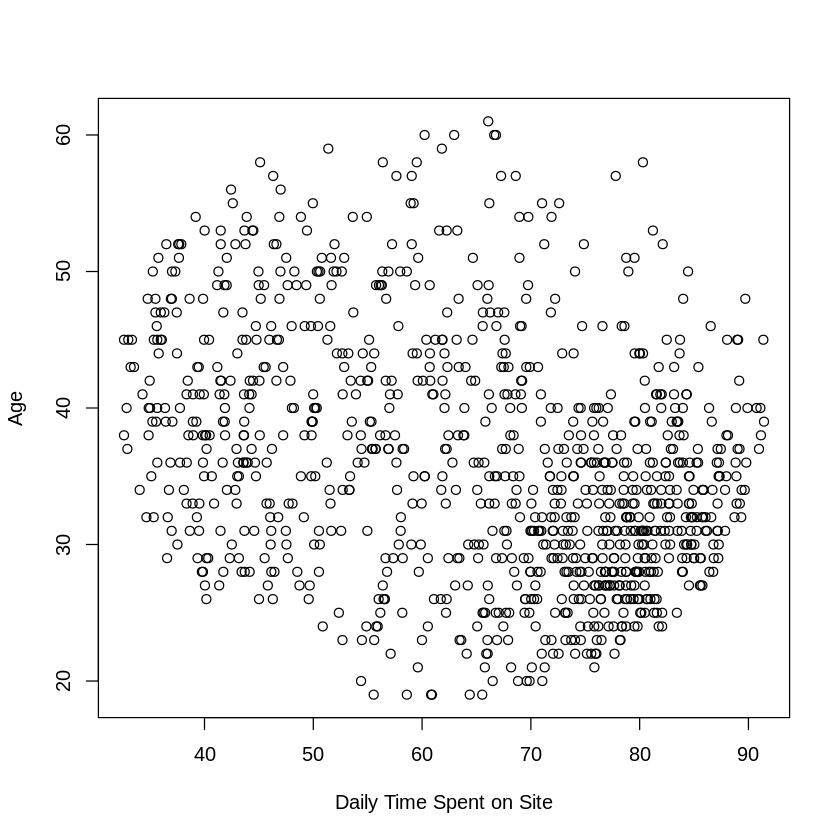

In [ ]:
plot(df$daily.time.spent.on.site, df$age, xlab="Daily Time Spent on Site", ylab="Age")

people between 20 and 40 ys spend the most time on the internet

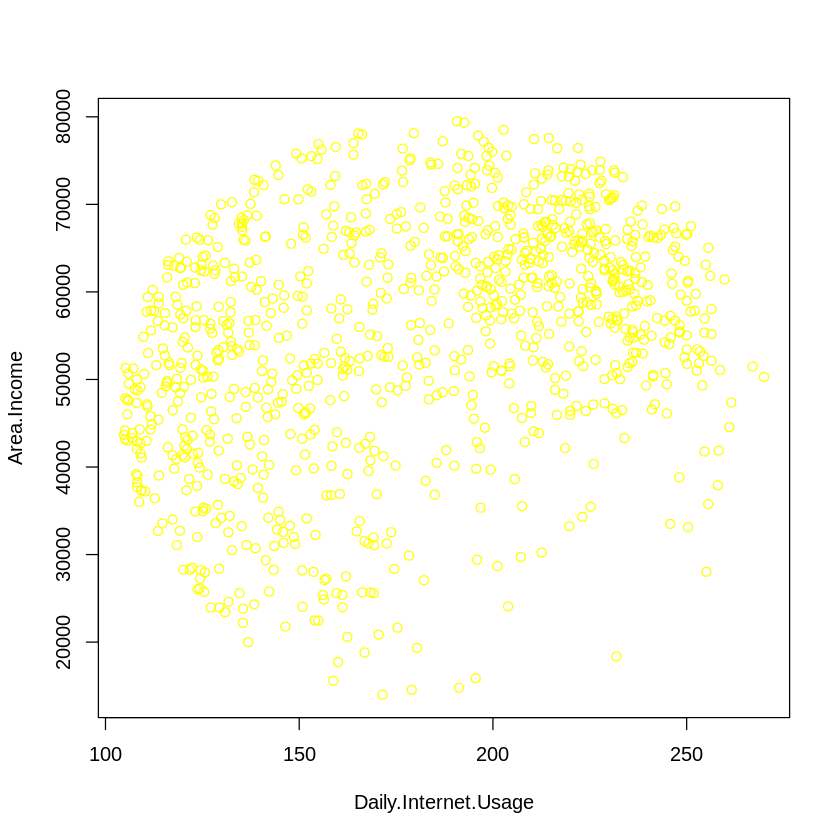

In [ ]:
plot(df$daily.internet.usage, df$area.income, col="yellow", xlab="Daily.Internet.Usage", ylab="Area.Income")

people with a higher income have a higher daily internet usage. the lowest internet usage is observed by mid level earners in the dataset. 

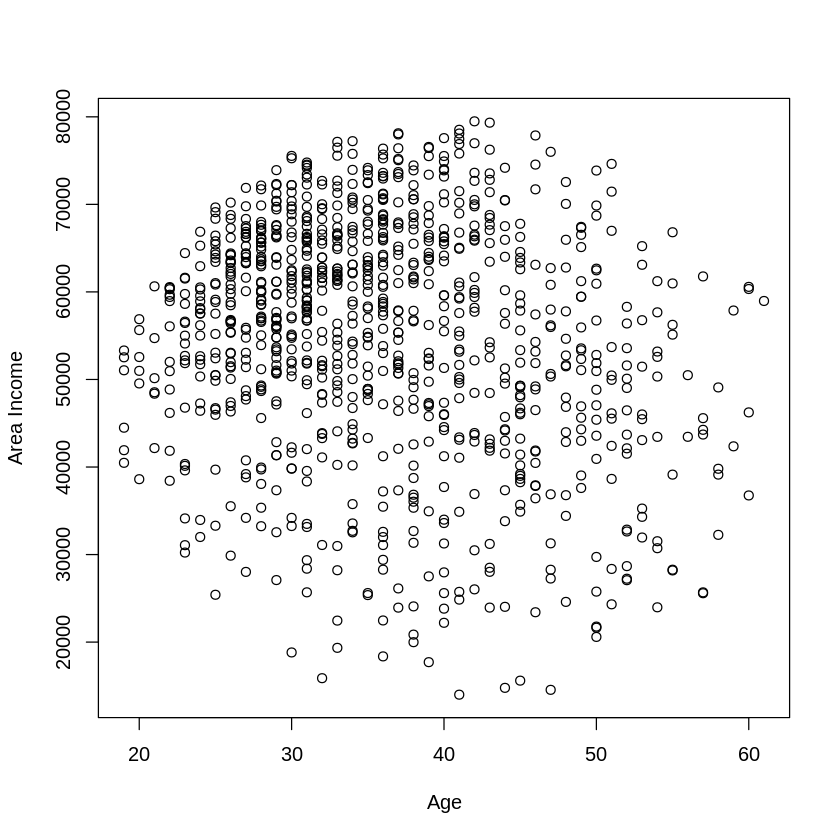

In [ ]:
plot(df$age, df$area.income, xlab="Age", ylab="Area Income")

people within 20-40 have the highest ncome and they're also the people who watch ads the most..

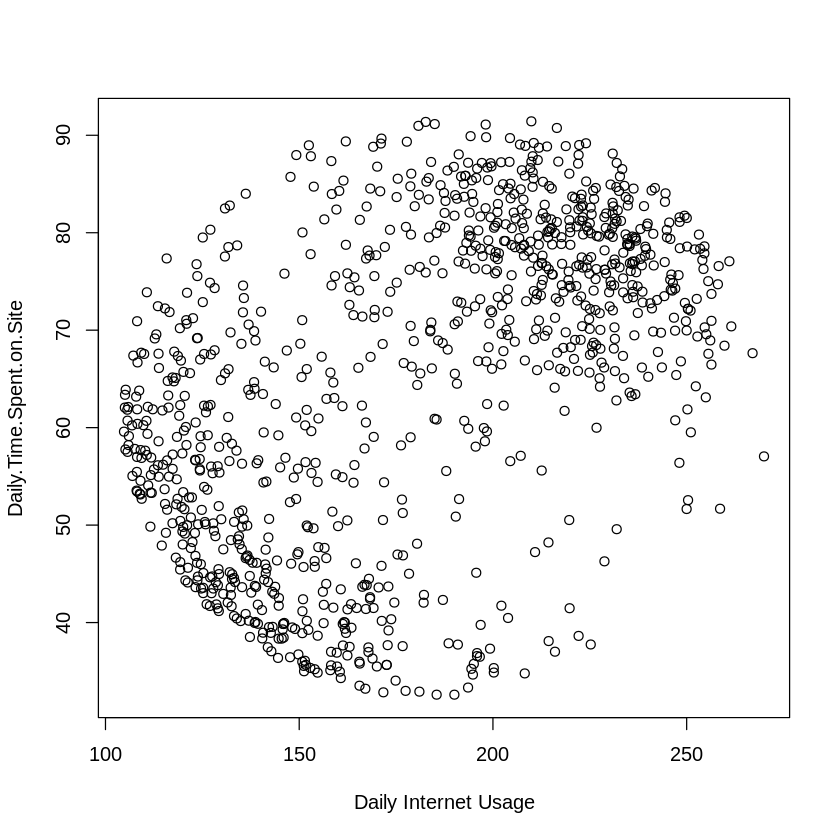

In [ ]:
plot(df$daily.internet.usage, df$daily.time.spent.on.site, xlab="Daily Internet Usage", ylab="Daily.Time.Spent.on.Site")

They are directly proportional. More time spent on the site means that more internet's being used which makes sense.

## RECOMMENDATIONS



*   Figure out a way to attract more males to wach the ads.
*   All elderly people watch the ads so entertain them more
*   Target 20yr olds to watch more ads.
*   Grow the women market since it's already established.
*   Have less ads at night


challenging the solution

figure out the specific ads that are frequently wathed and at what specific time and by which gender

## CONTINUATION FEATURE ENGINEERING

In [ ]:
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



In [ ]:
names(df)

[1] "daily.time.spent.on.site" "age"                     
 [3] "area.income"              "daily.internet.usage"    
 [5] "ad.topic.line"            "city"                    
 [7] "gender"                   "country"                 
 [9] "timestamp"                "clicked.on.ad"           
[11] "year"                     "month"                   
[13] "hour"

In [ ]:
num<- list(df$area.income, df$daily.internet.usage, df$daily.time.spent.on.site, df$age)

 check for correlation on numeric columns alone

In [ ]:
cor(df[sapply(df, is.numeric)])

Warning message in cor(df[sapply(df, is.numeric)]):
“the standard deviation is zero”


,daily.time.spent.on.site,age,area.income,daily.internet.usage,clicked.on.ad,year,month,hour
daily.time.spent.on.site,1.0000000000,-0.33151334,0.31095441,0.51865848,-0.74811656,NA,-0.01091956,0.0008949812
age,-0.3315133428,1.00000000,-0.18260496,-0.36720856,0.49253127,NA,0.02368925,-0.0499051285
area.income,0.3109544125,-0.18260496,1.00000000,0.33749553,-0.47625463,NA,-0.05021613,0.0345729170
daily.internet.usage,0.5186584753,-0.36720856,0.33749553,1.00000000,-0.78653918,NA,0.01752985,0.0743469886
clicked.on.ad,-0.7481165641,0.49253127,-0.47625463,-0.78653918,1.00000000,NA,0.01609546,-0.0474310291
year,NA,NA,NA,NA,NA,1,NA,NA
month,-0.0109195620,0.02368925,-0.05021613,0.01752985,0.01609546,NA,1.00000000,-0.0137476053
hour,0.0008949812,-0.04990513,0.03457292,0.07434699,-0.04743103,NA,-0.01374761,1.0000000000


so we will drop the year column then check for correlation again

In [ ]:
drop<- c("year", "timestamp")
df1<- df[,!(names(df) %in% drop)]
head(df1, 3)

,daily.time.spent.on.site,age,area.income,daily.internet.usage,ad.topic.line,city,gender,country,clicked.on.ad,month,hour
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,f,Tunisia,0,3,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,m,Nauru,0,4,1
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,f,San Marino,0,3,20


In [ ]:
cor(df1[sapply(df1, is.numeric)])

,daily.time.spent.on.site,age,area.income,daily.internet.usage,clicked.on.ad,month,hour
daily.time.spent.on.site,1.0000000000,-0.33151334,0.31095441,0.51865848,-0.74811656,-0.01091956,0.0008949812
age,-0.3315133428,1.00000000,-0.18260496,-0.36720856,0.49253127,0.02368925,-0.0499051285
area.income,0.3109544125,-0.18260496,1.00000000,0.33749553,-0.47625463,-0.05021613,0.0345729170
daily.internet.usage,0.5186584753,-0.36720856,0.33749553,1.00000000,-0.78653918,0.01752985,0.0743469886
clicked.on.ad,-0.7481165641,0.49253127,-0.47625463,-0.78653918,1.00000000,0.01609546,-0.0474310291
month,-0.0109195620,0.02368925,-0.05021613,0.01752985,0.01609546,1.00000000,-0.0137476053
hour,0.0008949812,-0.04990513,0.03457292,0.07434699,-0.04743103,-0.01374761,1.0000000000


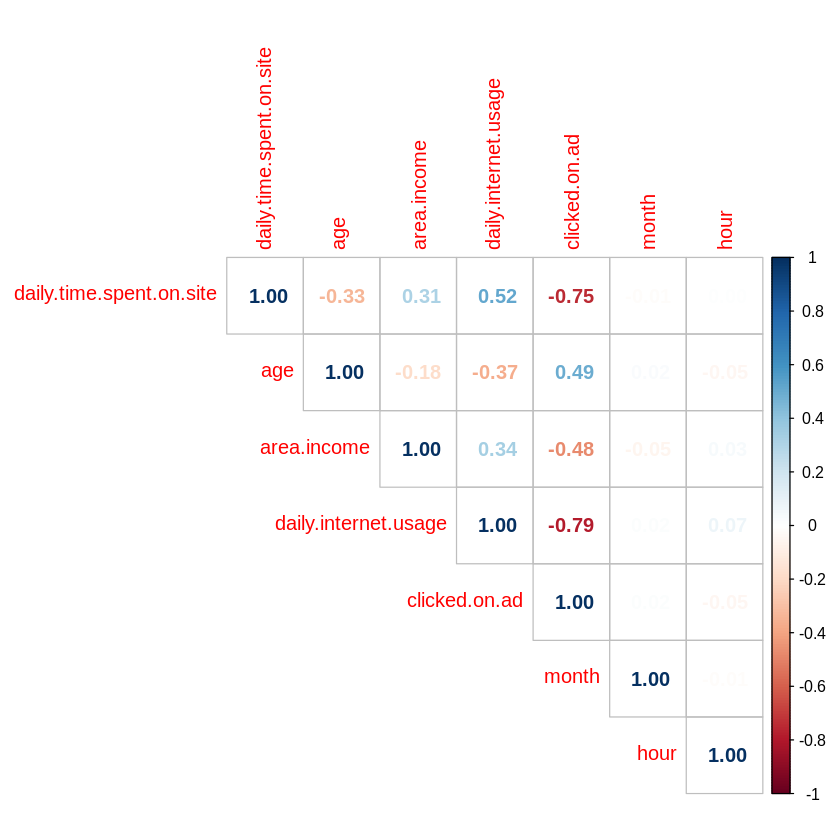

In [ ]:
corrplot(cor(df1[sapply(df1, is.numeric)]),
    method= "number",
    type="upper"
    )

daily time spent on the site and daily internet usage have the strongest positive correlation. We have good values so we shall proceed with these columns now lets check for correlation for the character columns.

In [ ]:
names(df1)

[1] "daily.time.spent.on.site" "age"                     
 [3] "area.income"              "daily.internet.usage"    
 [5] "ad.topic.line"            "city"                    
 [7] "gender"                   "country"                 
 [9] "clicked.on.ad"            "month"                   
[11] "hour"

In [ ]:
# set.seed(1234)
# x<- rep(c("A", "B"), 20)
# y<- sample(c("C","D"), 40, replace=T)
# table(x,y)
# chisq.test(table(x,y), correct=F)

# #lets make a matrix with tons of columns
# data<- as.data.frame(
#   matrix(
#     sample(letters[], 2000, replace=T),
#     ncol=25
#   )
# )

## MODELLING

In [ ]:
head(df1, 3)

,daily.time.spent.on.site,age,area.income,daily.internet.usage,ad.topic.line,city,gender,country,clicked.on.ad,month,hour
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,f,Tunisia,0,3,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,m,Nauru,0,4,1
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,f,San Marino,0,3,20


SVM

In [ ]:
str(df1)

'data.frame':	1000 obs. of  11 variables:
 $ daily.time.spent.on.site: num  69 80.2 69.5 74.2 68.4 ...
 $ age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ area.income             : num  61834 68442 59786 54806 73890 ...
 $ daily.internet.usage    : num  256 194 236 246 226 ...
 $ ad.topic.line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ city                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ gender                  : chr  "f" "m" "f" "m" ...
 $ country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ clicked.on.ad           : int  0 0 0 0 0 0 0 1 0 0 ...
 $ month                   : num  3 4 3 1 6 5 1 3 4 7 ...
 $ hour                    : int  0 1 20 2 3 14 20 1 9 1 ...


selecting the columns we'll be working with

In [ ]:
df2<- subset(df1, select=c(1,2,3,4,9))
head(df2, 3)

,daily.time.spent.on.site,age,area.income,daily.internet.usage,clicked.on.ad
,<dbl>,<int>,<dbl>,<dbl>,<int>
1,68.95,35,61833.90,256.09,0
2,80.23,31,68441.85,193.77,0
3,69.47,26,59785.94,236.50,0


In [ ]:
install.packages("caTools")
library(caTools)
# set seed to avoid different radom numbers
set.seed(123)
# split the sample specifying the target variable
split=sample.split(df2$clicked.on.ad, SplitRatio=0.7)

training_set=subset(df2, split==TRUE)
test_set<- subset(df2, split== FALSE)
split


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1]  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
  [13]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
  [25]  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE
  [37]  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE
  [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE
  [61] FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
  [73] FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE
  [85]  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE
  [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE
 [109]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
 [121] FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [133] FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE
 [145] FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
 [157] FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [169]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE FALSE
 [181]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE
 [193]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
 [205]  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
 [217]  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE
 [229]  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [241] FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE
 [253]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE
 [265]  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
 [277]  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
 [289] FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [301]  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE
 [313] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
 [325]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [337] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE
 [349]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE
 [361]  TRUE FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
 [373]  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE
 [385]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [397]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [409] FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [421]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
 [433] FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
 [445]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE
 [457] FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
 [469] FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE
 [481]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
 [493] FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
 [505]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [517] FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE FALSE
 [529]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [541]  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
 [553]  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
 [565]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE
 [577] FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE
 [589] FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
 [601] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRU

In [ ]:
training_set

,daily.time.spent.on.site,age,area.income,daily.internet.usage,clicked.on.ad
,<dbl>,<int>,<dbl>,<dbl>,<int>
1,68.95,35,61833.90,256.09,0
3,69.47,26,59785.94,236.50,0
6,59.99,23,59761.56,226.74,0
7,88.91,33,53852.85,208.36,0
8,66.00,48,24593.33,131.76,1
10,69.88,20,55642.32,183.82,0
11,47.64,49,45632.51,122.02,1
12,83.07,37,62491.01,230.87,0
13,69.57,48,51636.92,113.12,1


In [ ]:
test_set

,daily.time.spent.on.site,age,area.income,daily.internet.usage,clicked.on.ad
,<dbl>,<int>,<dbl>,<dbl>,<int>
2,80.23,31,68441.85,193.77,0
4,74.15,29,54806.18,245.89,0
5,68.37,35,73889.99,225.58,0
9,74.53,30,68862.00,221.51,0
14,79.52,24,51739.63,214.23,0
23,41.49,52,32635.70,164.83,1
26,78.74,28,64828.00,204.79,0
29,70.20,34,32708.94,119.20,1
34,55.60,23,30227.98,212.58,1


scaling the features

In [ ]:
training_set[-3] = scale(training_set[-3])
training_set[-3]
test_set[-3] = scale(test_set[-3])
test_set[-3]

,daily.time.spent.on.site,age,daily.internet.usage,clicked.on.ad
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.26325221,-0.14322274,1.7399956,-0.9992855
3,0.29635677,-1.13694877,1.2960228,-0.9992855
6,-0.30716486,-1.46819077,1.0748296,-0.9992855
7,1.53395810,-0.36405074,0.6582793,-0.9992855
8,0.07544748,1.29215931,-1.0777246,0.9992855
10,0.32245845,-1.79943278,0.1021235,-0.9992855
11,-1.09339822,1.40257331,-1.2984646,0.9992855
12,1.16216840,0.07760527,1.1684287,-0.9992855
13,0.30272303,1.29215931,-1.5001674,0.9992855


,daily.time.spent.on.site,age,daily.internet.usage,clicked.on.ad
,<dbl>,<dbl>,<dbl>,<dbl>
2,0.91302300,-0.53591563,0.28031449,-0.9983319
4,0.53787738,-0.78307118,1.48093503,-0.9983319
5,0.18124223,-0.04160452,1.01308002,-0.9983319
9,0.56132398,-0.65949340,0.91932473,-0.9983319
14,0.86921488,-1.40096006,0.75162486,-0.9983319
23,-1.47729631,2.05921769,-0.38633859,0.9983319
26,0.82108764,-0.90664896,0.53416787,-0.9983319
29,0.29415613,-0.16518230,-1.43745746,0.9983319
34,-0.60668698,-1.52453784,0.71361596,0.9983319


fitting svm into the training set

In [ ]:
install.packages("e1071")
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
str(df2)

'data.frame':	1000 obs. of  5 variables:
 $ daily.time.spent.on.site: num  69 80.2 69.5 74.2 68.4 ...
 $ age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ area.income             : num  61834 68442 59786 54806 73890 ...
 $ daily.internet.usage    : num  256 194 236 246 226 ...
 $ clicked.on.ad           : int  0 0 0 0 0 0 0 1 0 0 ...


In [ ]:
df2$clicked.on.ad<- as.factor(df2$clicked.on.ad)

In [ ]:
training_set[-3]$clicked.on.ad<- as.factor(training_set[-3]$clicked.on.ad)

In [ ]:
str(training_set[-3])

'data.frame':	700 obs. of  4 variables:
 $ daily.time.spent.on.site: num  0.2633 0.2964 -0.3072 1.534 0.0754 ...
 $ age                     : num  -0.143 -1.137 -1.468 -0.364 1.292 ...
 $ daily.internet.usage    : num  1.74 1.296 1.075 0.658 -1.078 ...
 $ clicked.on.ad           : Factor w/ 2 levels "-0.999285459001295",..: 1 1 1 1 2 1 2 1 2 2 ...


In [ ]:
classifier<- svm(formula<- clicked.on.ad ~ .,
                  data<- training_set[-3],
                  type<- "C-classification",
                  kernel= "linear")
classifier                  

predicting the results

In [ ]:
y_pred<- predict(classifier, newdata<- training_set[-3])
y_pred

1                  3                  6                  7 
-0.999285459001295 -0.999285459001295 -0.999285459001295 -0.999285459001295 
                 8                 10                 11                 12 
 0.999285459001295 -0.999285459001295  0.999285459001295 -0.999285459001295 
                13                 15                 16                 17 
 0.999285459001295  0.999285459001295  0.999285459001295  0.999285459001295 
                18                 19                 20                 21 
-0.999285459001295  0.999285459001295  0.999285459001295 -0.999285459001295 
                22                 24                 25                 27 
-0.999285459001295 -0.999285459001295  0.999285459001295  0.999285459001295 
                28                 30                 31                 32 
 0.999285459001295 -0.999285459001295 -0.999285459001295 -0.999285459001295 
                33                 35                 37                 40 
 0.999285459001295  0.999285459001295  0.999285459001295  0.999285459001295 
                42                 44                 47                 48 
-0.999285459001295 -0.999285459001295 -0.999285459001295 -0.999285459001295 
                49                 50                 51                 52 
 0.999285459001295  0.999285459001295 -0.999285459001295 -0.999285459001295 
                53                 54                 55                 57 
 0.999285459001295  0.999285459001295  0.999285459001295  0.999285459001295 
                60                 63                 64                 67 
 0.999285459001295 -0.999285459001295 -0.999285459001295  0.999285459001295 
                69                 70                 71                 72 
-0.999285459001295  0.999285459001295  0.999285459001295 -0.999285459001295 
                74                 76                 77                 78 
 0.999285459001295 -0.999285459001295  0.999285459001295 -0.999285459001295 
                80                 81                 82                 83 
 0.999285459001295 -0.999285459001295 -0.999285459001295  0.999285459001295 
                85                 86                 87                 89 
-0.999285459001295  0.999285459001295 -0.999285459001295  0.999285459001295 
                92                 93                 96                 97 
 0.999285459001295 -0.999285459001295 -0.999285459001295  0.999285459001295 
                98                 99                100                101 
 0.999285459001295  0.999285459001295 -0.999285459001295  0.999285459001295 
               102                104                105                107 
-0.999285459001295 -0.999285459001295 -0.999285459001295 -0.999285459001295 
               109                110                111                112 
 0.999285459001295 -0.999285459001295  0.999285459001295 -0.999285459001295 
               113                114                115                117 
-0.999285459001295  0.999285459001295 -0.999285459001295  0.999285459001295 
               118                119                122                123 
 0.999285459001295 -0.999285459001295 -0.999285459001295 -0.999285459001295 
               125                126                127                128 
 0.999285459001295 -0.999285459001295  0.999285459001295 -0.999285459001295 
               129                131                132                134 
-0.999285459001295  0.999285459001295  0.999285459001295 -0.999285459001295 
               135                137                142                143 
 0.999285459001295  0.999285459001295  0.999285459001295  0.999285459001295 
               144                147                148                149 
-0.999285459001295  0.999285459001295  0.999285459001295  0.999285459001295 
               150                151                153                154 
 0.999285459001295  0.999285459001295  0.999285459001295 -0.999285459001295 
             

creating the confusion matrix

In [ ]:
install.packages("caret")
library(caret)

In [ ]:
cm<- table(test_set[-3]$clicked.on.ad, y_pred)
cm

                    y_pred
                     -0.999285459001295 0.999285459001295
  -0.998331942124796                148                 2
  0.998331942124796                  13               137